In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("G:\My Drive\Sem 2\ML\ML Project\Project\A_Z Handwritten Data.csv")

In [3]:
df.shape

(372450, 785)

In [4]:
data_array = np.array(df,dtype=np.uint8)

In [5]:
data_array.shape

(372450, 785)

In [6]:
alphabets = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

Data Sample count for each alphabet

In [37]:
labels = data_array[:,0]
#print(len(labels))
x = data_array[:,1:].reshape(372450,28,28)/255.
print((data_array[:,1:]).shape)
#del data_array
unique, counts = np.unique(labels, return_counts=True)
alphabets_list = list(zip(alphabets, counts))
for i in alphabets_list:
    print(i[0],' : ',i[1])

(372450, 784)
A  :  13869
B  :  8668
C  :  23409
D  :  10134
E  :  11440
F  :  1163
G  :  5762
H  :  7218
I  :  1120
J  :  8493
K  :  5603
L  :  11586
M  :  12336
N  :  19010
O  :  57825
P  :  19341
Q  :  5812
R  :  11566
S  :  48419
T  :  22495
U  :  29008
V  :  4182
W  :  10784
X  :  6272
Y  :  10859
Z  :  6076


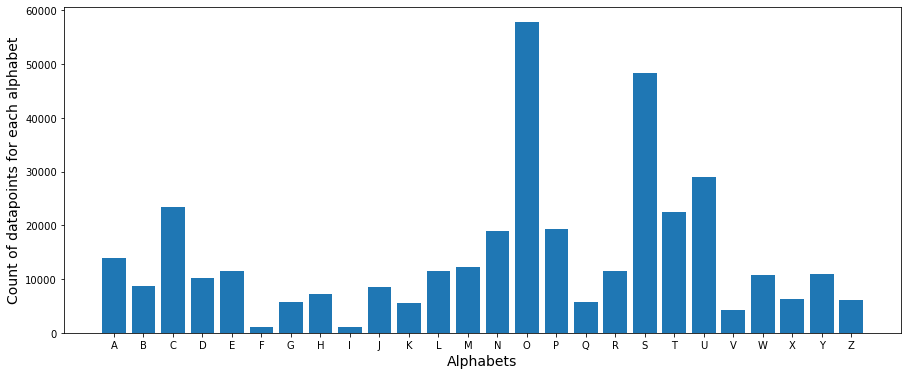

In [38]:
fig=plt.figure(figsize=(15,6))
plt.xlabel('Alphabets',fontsize=14)
plt.ylabel('Count of datapoints for each alphabet',fontsize=14)
plt.bar(alphabets,counts)
plt.show()

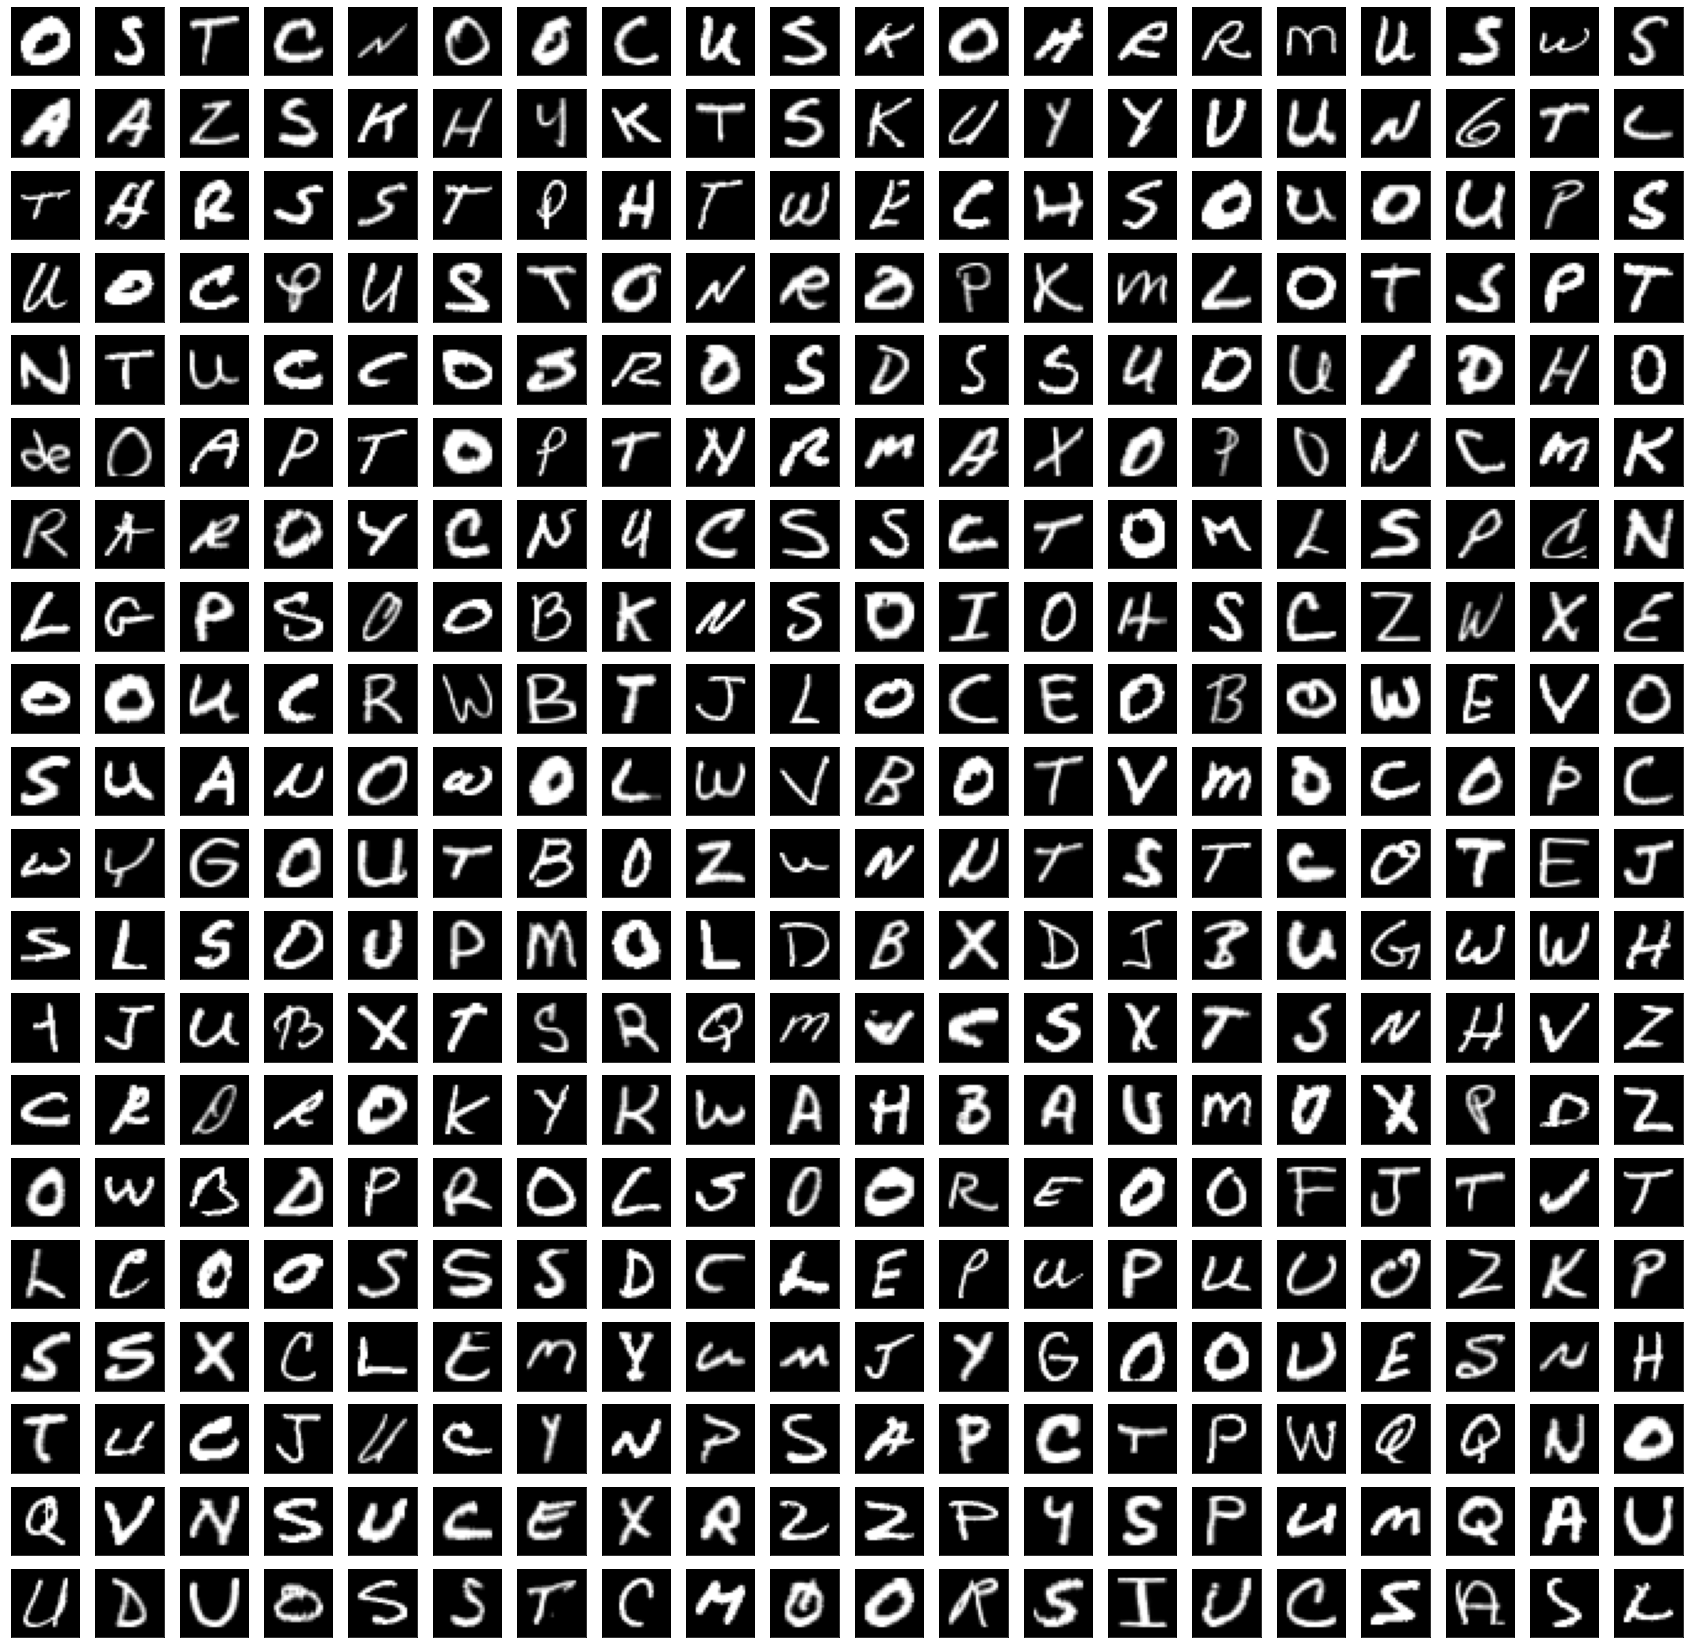

In [13]:
a=np.random.randint(low=0,high=372449,size=400)
fig=plt.figure(figsize=(30,30))
c=1
for i in a:
    fig.add_subplot(20,20,c)
    plt.xticks([]);    plt.yticks([]);    plt.imshow(x[i],cmap='gray')
    c+=1
del a

In [14]:
del c, alphabets_list, counts, unique #deleting further not required variables due to memory issues 

In [15]:
from sklearn.model_selection import train_test_split as train_test_split

In [16]:
#x=x.reshape(372450,28,28,1)
x_train,x_test,y_train,y_test = train_test_split(x,labels,test_size=0.01)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(368725, 28, 28) (3725, 28, 28) (368725,) (3725,)


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import SGD

CNN network design

In [18]:
nn_model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(26,activation='softmax')])
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                          

C:\Users\Sahil\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Fitting the Neural Network model

In [19]:
nn_model_fit = nn_model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=1)

10371/10371 [==============================] - 2384s 230ms/step - loss: 0.1420 - accuracy: 0.9609 - val_loss: 0.0496 - val_accuracy: 0.9855


In [21]:
def test_images(n=225):
    index=np.random.randint(low=0,high=3720,size=n)
    fig=plt.figure(figsize=(30,40))
    for i in range(n):
        [pred]=nn_model.predict(x_test[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=y_test[index[i]]
        fig.add_subplot(15,15,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(alphabets[pred],color='green',fontsize=25,fontweight="bold")
        else:
            plt.title(alphabets[pred],color='red',fontsize=25,fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28,28),cmap='gray')

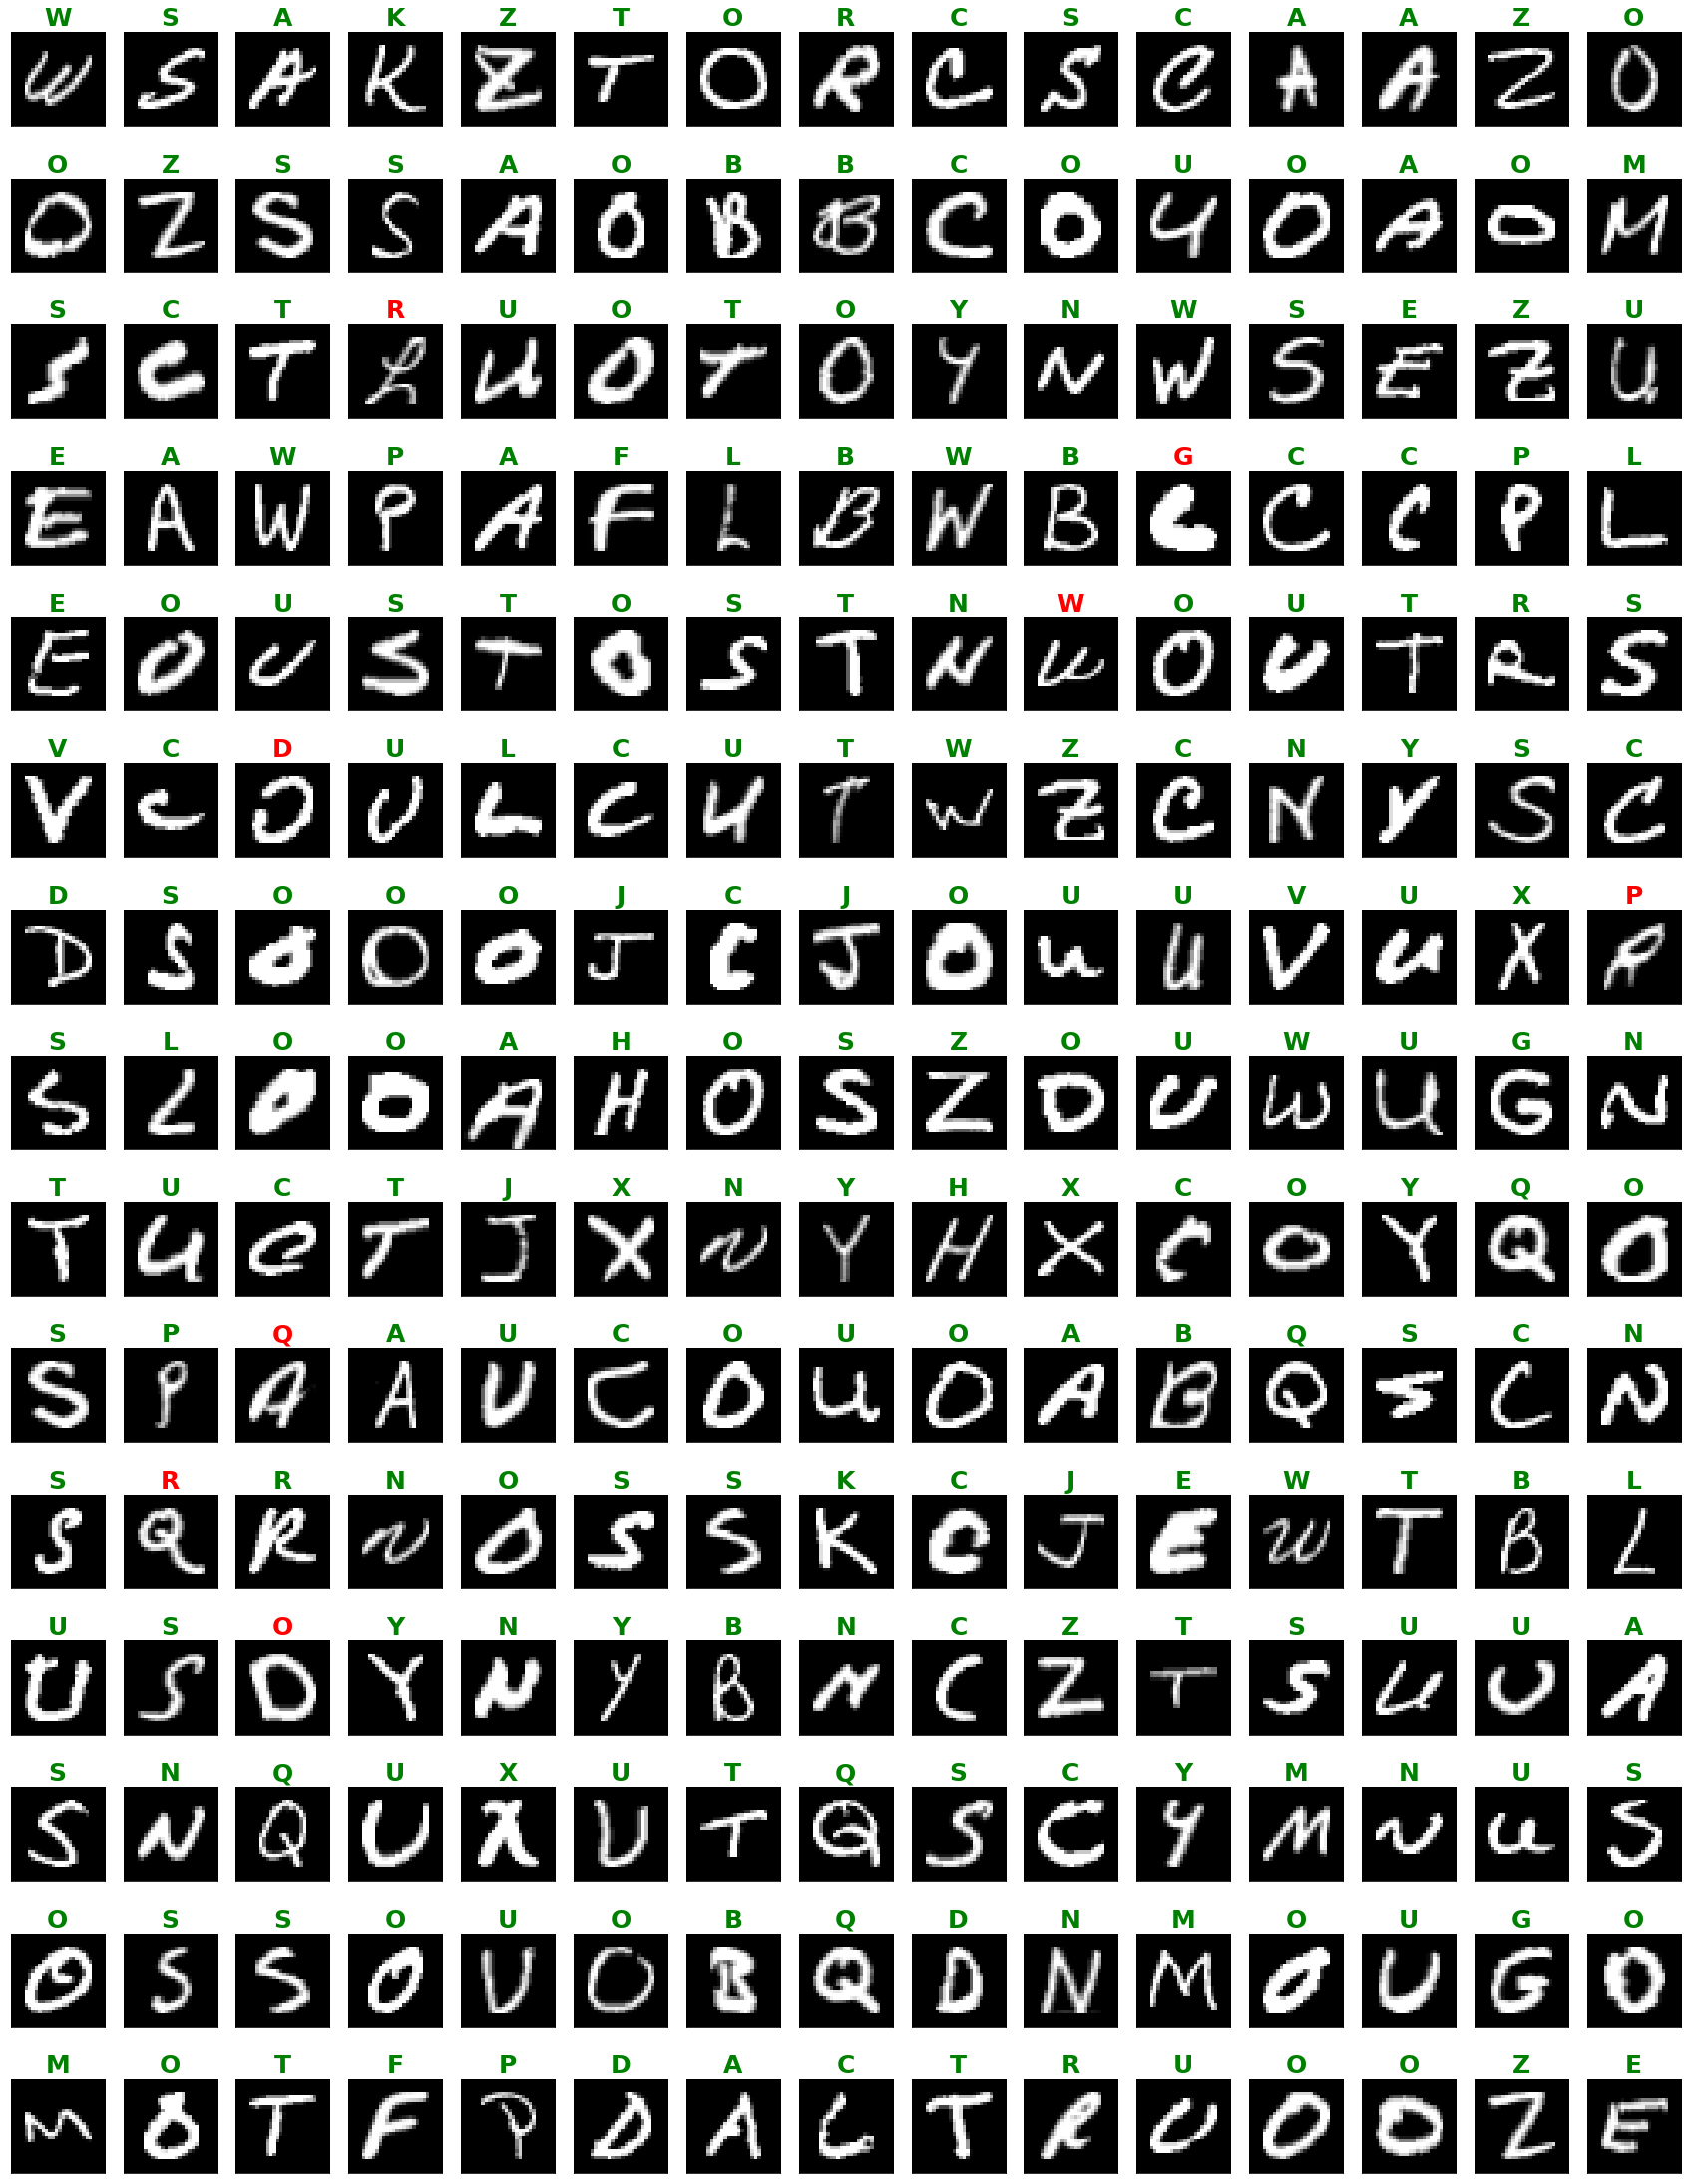

In [22]:
test_images()

In [23]:
import cv2

In [24]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

Below is the function to run the model on unseen data

In [25]:
def unseendata_test(filepath):
    image = cv2.imread(filepath)
    blur_image=cv2.medianBlur(image,7)

    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(grey,200,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,41,25)

    contours,hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []

    
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda b:b[1][0], reverse=False))


    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        
        cv2.rectangle(blur_image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)
        
        digit = thresh[y:y+h, x:x+w]
         
        resized_digit = cv2.resize(digit, (18,18))
        
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        
        preprocessed_digits.append(padded_digit)
    plt.xticks([])
    plt.yticks([])
    plt.title("Input Image",color='red')
    plt.imshow(image, cmap="gray")
    plt.show()

    inp = np.array(preprocessed_digits)
    figr=plt.figure(figsize=(len(inp),4))
    i=1
    alphabets_unseen=[]
    for digit in preprocessed_digits:
        [prediction] = nn_model.predict(digit.reshape(1, 28, 28, 1)/255.)
        pred=alpha[np.argmax(prediction)]
        alphabets_unseen.append(pred)
        figr.add_subplot(1,len(inp),i)
        i+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred,color='green',fontsize=18,fontweight="bold")
    print("Alphabets detected : " ,*alphabets_unseen)

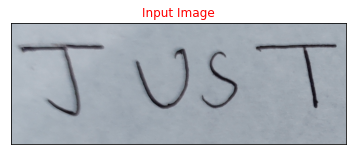

Alphabets detected :  J U S T


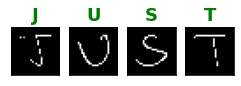

In [27]:
unseendata_test('G:\\My Drive\\Sem 2\\ML\\ML Project\\Project\\test_image_3.png')

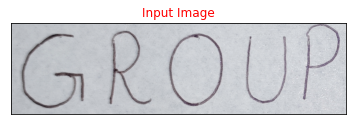

Alphabets detected :  G M R O U P


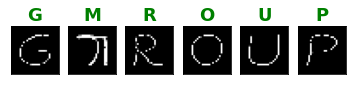

In [28]:
unseendata_test('G:\\My Drive\\Sem 2\\ML\\ML Project\\Project\\test_image_4.png')

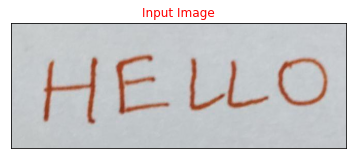

Alphabets detected :  H E L L O


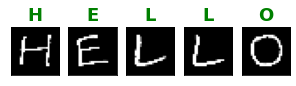

In [29]:
unseendata_test('G:\\My Drive\\Sem 2\\ML\\ML Project\\Project\\test_image_6.png')

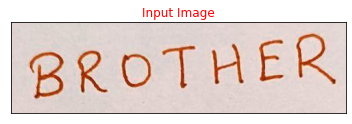

Alphabets detected :  B R O T H E R


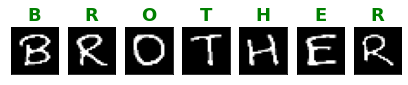

In [31]:
unseendata_test('G:\\My Drive\\Sem 2\\ML\\ML Project\\Project\\test_image_7.png')

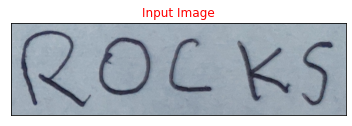

Alphabets detected :  R O C K S


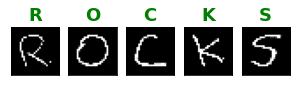

In [34]:
unseendata_test('G:\\My Drive\\Sem 2\\ML\\ML Project\\Project\\test_image_8.png')